In [1]:
# Import requires libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler

In [2]:
# Read the dataset
Data=pd.read_csv("Downloads/archive (1)/supply_chain_data.csv")

In [3]:
#Retrieve first 5 rows
Data.head()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [4]:
# info of the columns of dataset such as datatypes and non null counts
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

In [5]:
# Checking if there are any null values in the data
# isnull function checks each row in every column and sum function sums up the null count column wise
Data.isnull().sum()

Product type               0
SKU                        0
Price                      0
Availability               0
Number of products sold    0
Revenue generated          0
Customer demographics      0
Stock levels               0
Lead times                 0
Order quantities           0
Shipping times             0
Shipping carriers          0
Shipping costs             0
Supplier name              0
Location                   0
Lead time                  0
Production volumes         0
Manufacturing lead time    0
Manufacturing costs        0
Inspection results         0
Defect rates               0
Transportation modes       0
Routes                     0
Costs                      0
dtype: int64

In [6]:
# Checking if there are any duplicated
Data.duplicated().sum()

0

## EDA

Text(0.5, 1.0, 'Product Type')

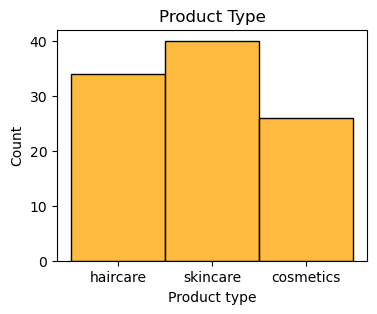

In [7]:
#Distribution of product type
fig = plt.figure(figsize=(4,3))
sns.histplot(data=Data,x='Product type',color='Orange')
plt.title('Product Type')

<Axes: xlabel='Price', ylabel='Count'>

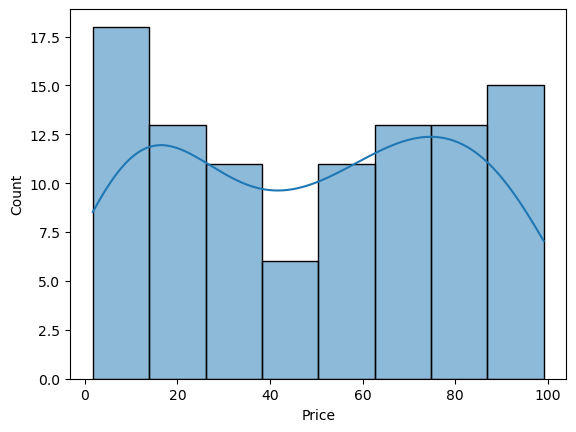

In [8]:
#Price distribution
sns.histplot(Data,x='Price',kde=True)

<Axes: xlabel='Price', ylabel='Number of products sold'>

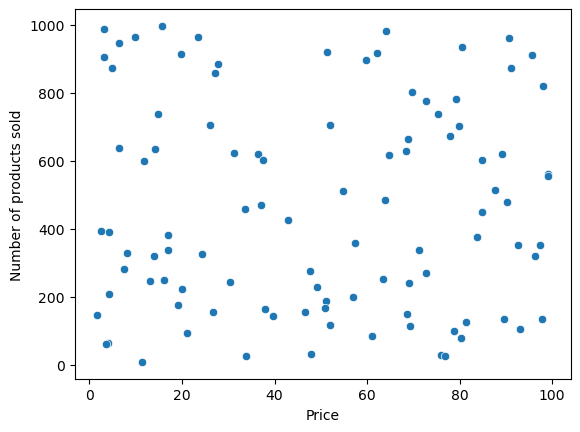

In [9]:
# Checking how the price and number of products sold are distributed
sns.scatterplot(Data,x='Price',y='Number of products sold')

In [10]:
# checking the discriptive statistics of price with product type
Data.groupby('Product type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Product type,,,,,,,,
cosmetics,26.0,57.361058,30.423912,2.397275,44.147347,64.311917,80.821379,97.760086
haircare,34.0,46.014279,28.850845,1.699976,26.796123,48.588874,69.678712,97.446947
skincare,40.0,47.259329,33.337844,4.078333,17.033205,37.228419,82.344926,99.171329


<Axes: xlabel='Price', ylabel='Product type'>

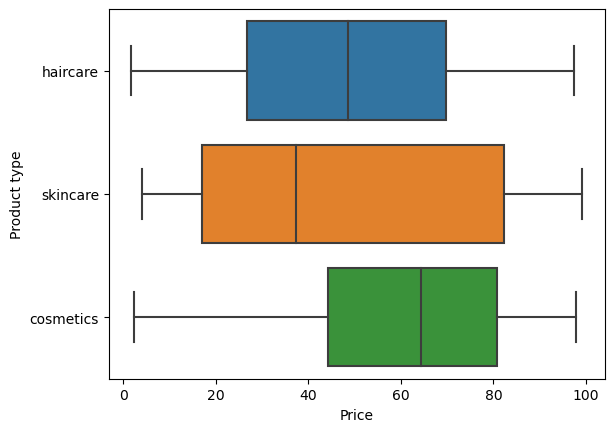

In [11]:
#Checking which product type has high demand 
sns.boxplot(Data,x='Price',y='Product type')

Text(0.5, 1.0, 'Location wise Price')

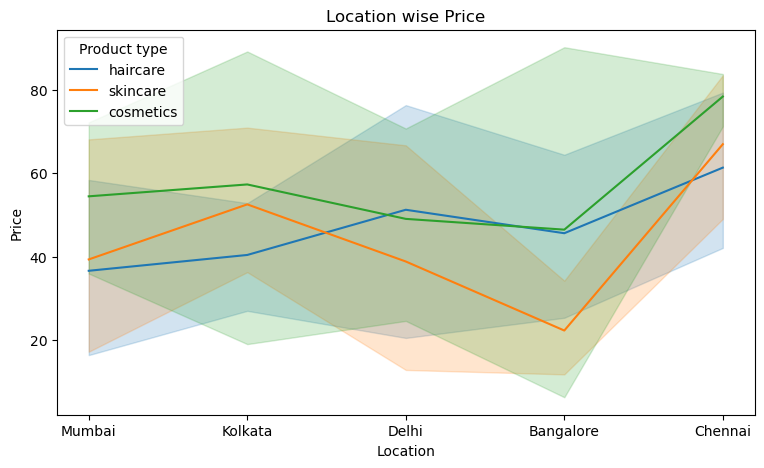

In [12]:
#Location wise distributuion of products
fig=plt.figure(figsize=(9,5))
sns.lineplot(Data,y='Price',x='Location',hue='Product type')
plt.title('Location wise Price')

<Axes: xlabel='Customer demographics', ylabel='Count'>

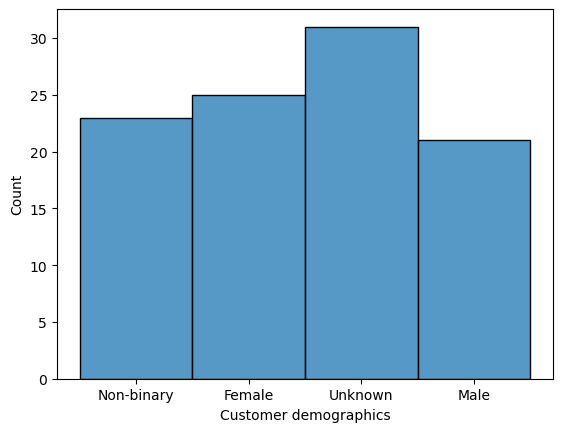

In [13]:
sns.histplot(Data,x='Customer demographics')

In [14]:
#Checking datatypes of columns
Data.dtypes

Product type                object
SKU                         object
Price                      float64
Availability                 int64
Number of products sold      int64
Revenue generated          float64
Customer demographics       object
Stock levels                 int64
Lead times                   int64
Order quantities             int64
Shipping times               int64
Shipping carriers           object
Shipping costs             float64
Supplier name               object
Location                    object
Lead time                    int64
Production volumes           int64
Manufacturing lead time      int64
Manufacturing costs        float64
Inspection results          object
Defect rates               float64
Transportation modes        object
Routes                      object
Costs                      float64
dtype: object

In [15]:
#Dropping SkU column , it is a ID
Data=Data.drop("SKU",axis=1)

In [16]:
# Encoding the categorical data
labelencoder=LabelEncoder()

In [17]:
columns=['Product type','Customer demographics','Shipping carriers','Supplier name','Location','Inspection results','Transportation modes','Routes']

for c in columns:
  Data[c]=labelencoder.fit_transform(Data[c])


Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    int32  
 1   Price                    100 non-null    float64
 2   Availability             100 non-null    int64  
 3   Number of products sold  100 non-null    int64  
 4   Revenue generated        100 non-null    float64
 5   Customer demographics    100 non-null    int32  
 6   Stock levels             100 non-null    int64  
 7   Lead times               100 non-null    int64  
 8   Order quantities         100 non-null    int64  
 9   Shipping times           100 non-null    int64  
 10  Shipping carriers        100 non-null    int32  
 11  Shipping costs           100 non-null    float64
 12  Supplier name            100 non-null    int32  
 13  Location                 100 non-null    int32  
 14  Lead time                10

In [18]:
# Checking the correlation with target variable(price)
Data.corr()['Price']

Product type              -0.118260
Price                      1.000000
Availability               0.019083
Number of products sold    0.005739
Revenue generated          0.038424
Customer demographics      0.141159
Stock levels               0.078261
Lead times                 0.044855
Order quantities           0.095819
Shipping times             0.071942
Shipping carriers          0.200970
Shipping costs             0.058543
Supplier name             -0.150637
Location                  -0.045747
Lead time                  0.152185
Production volumes        -0.124575
Manufacturing lead time   -0.301313
Manufacturing costs       -0.184123
Inspection results        -0.060739
Defect rates              -0.147247
Transportation modes       0.008989
Routes                     0.149359
Costs                      0.088501
Name: Price, dtype: float64

<Axes: >

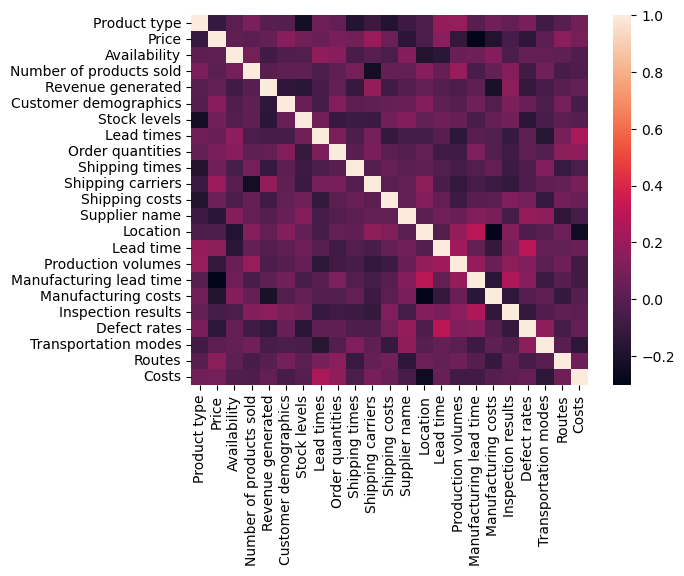

In [19]:
# Correlation metric
sns.heatmap(Data.corr(),annot=False)

<Figure size 800x800 with 0 Axes>

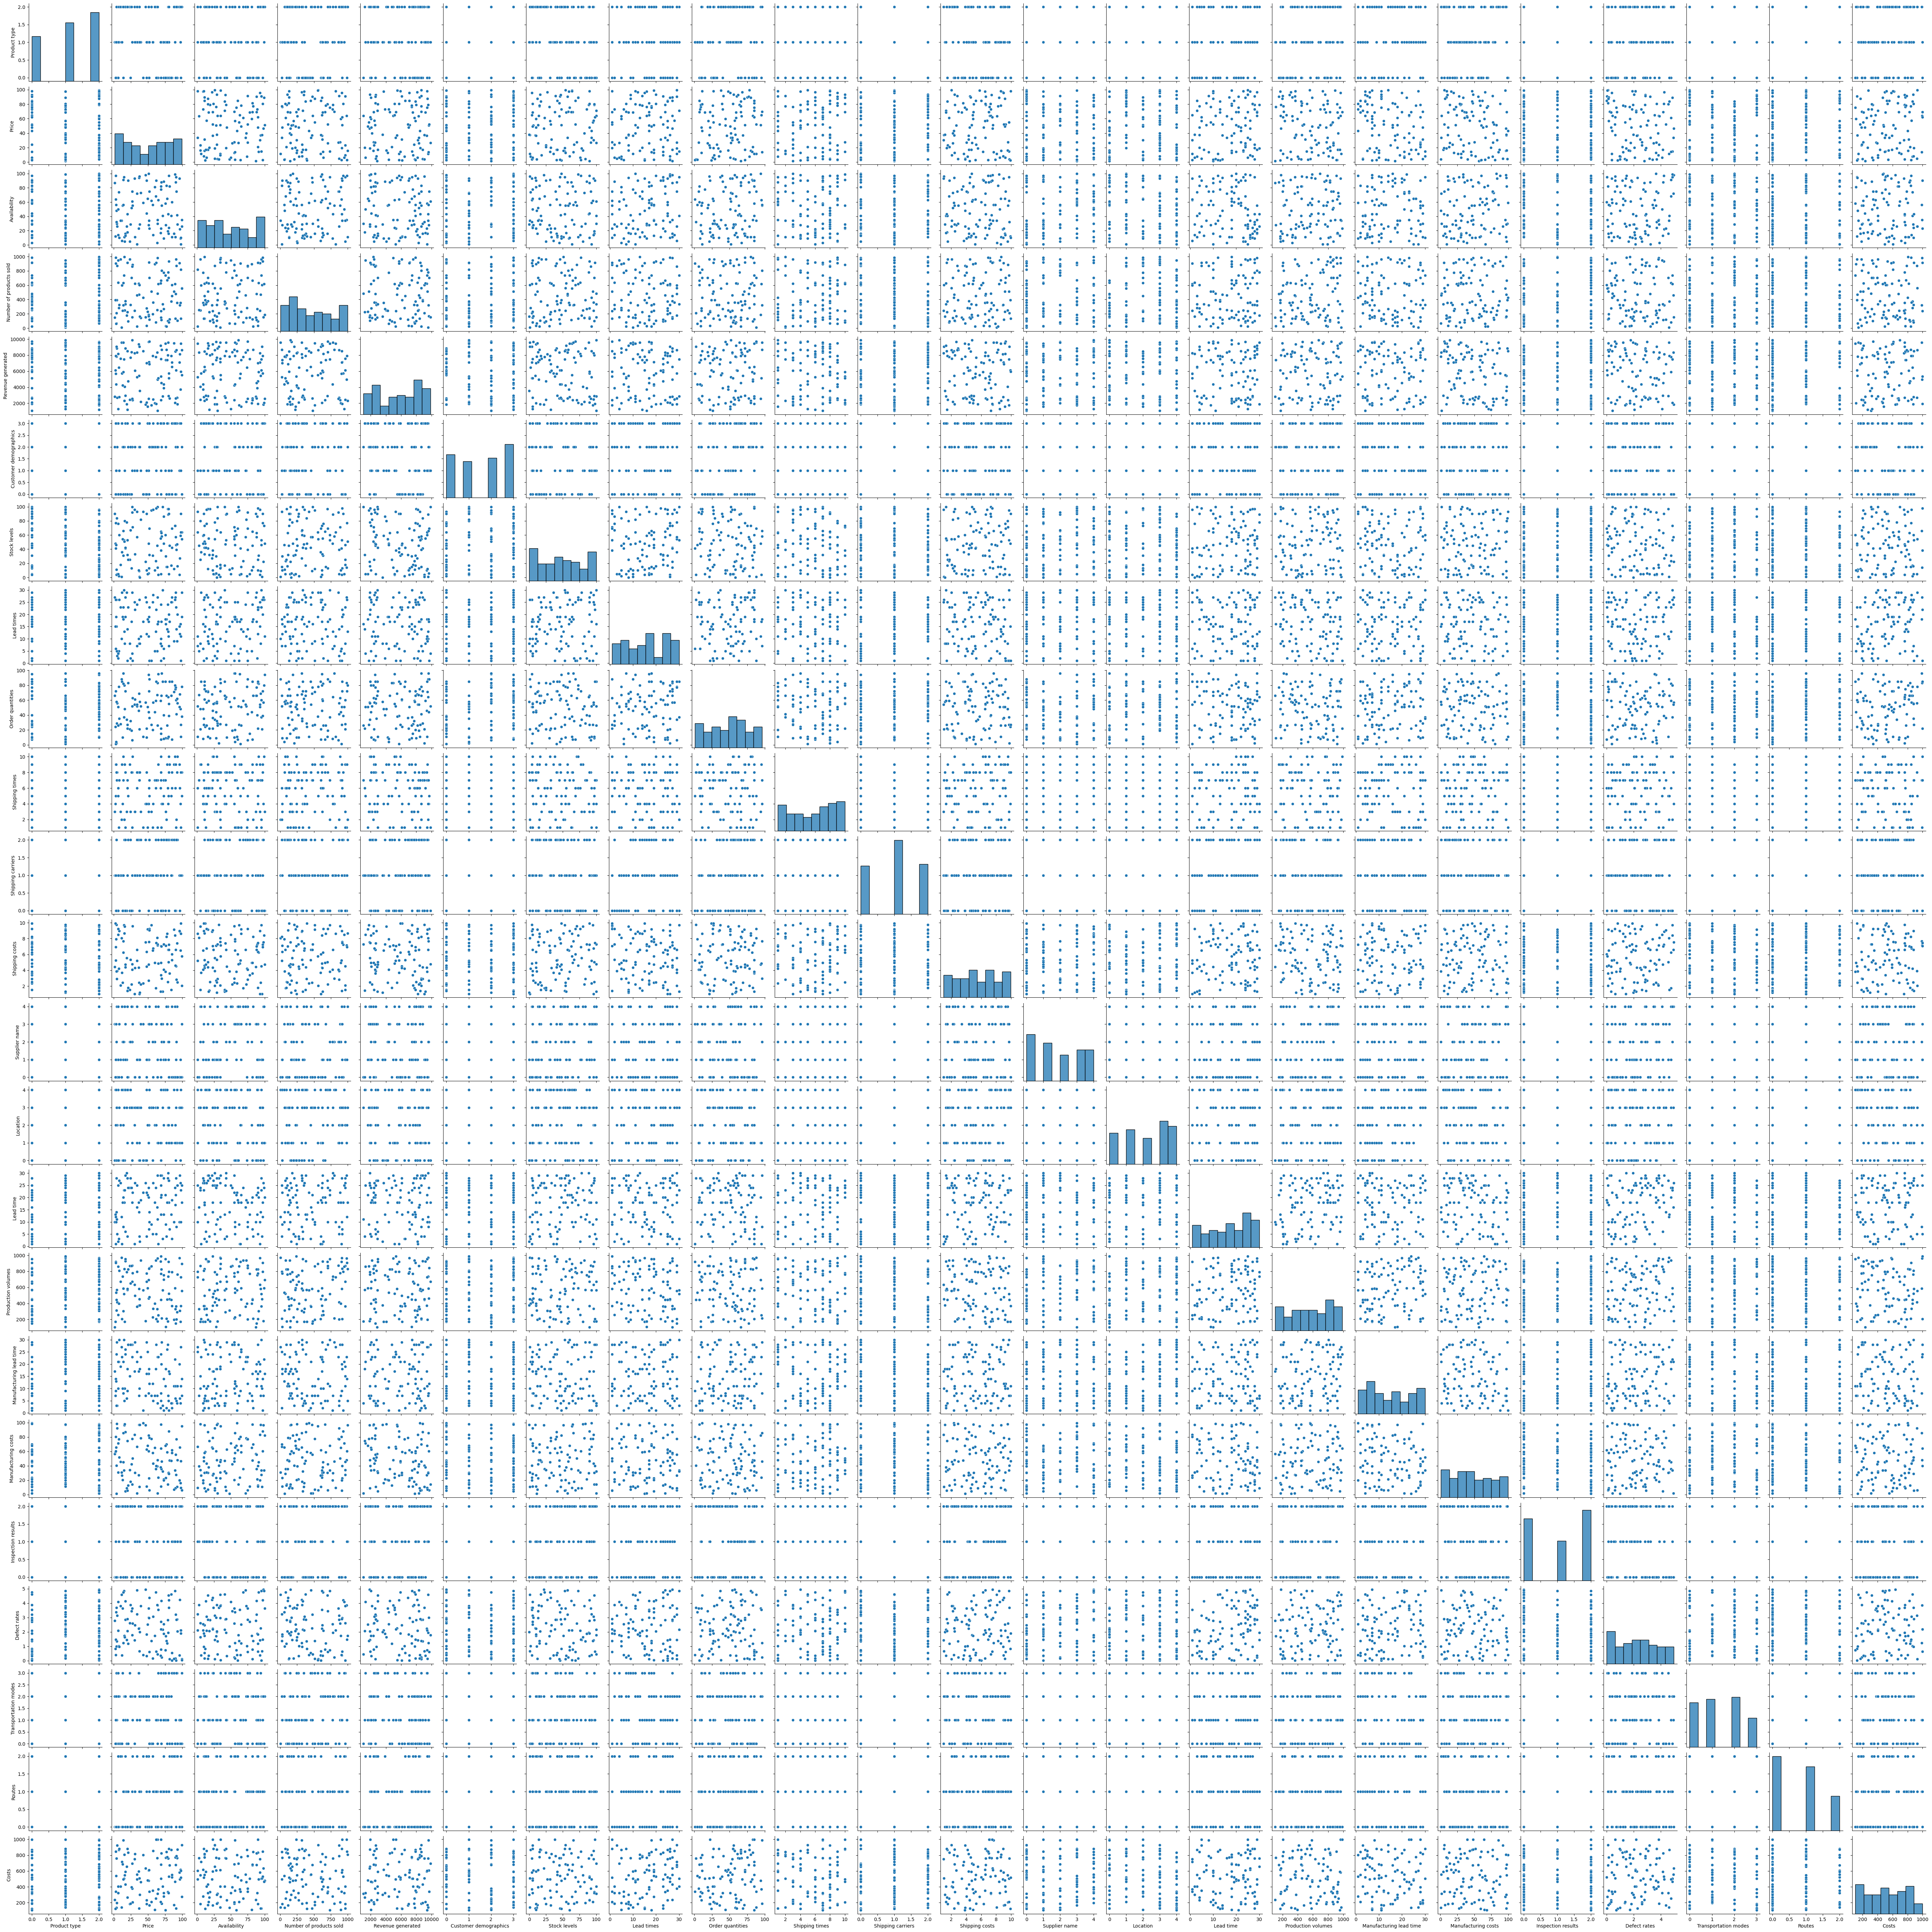

In [20]:
# How the data is related between two variables and to identify any trends or patterns in the data
plt.figure(figsize=(8,8))
sns.pairplot(Data)

In [21]:
# Checking outliers using z score approch
z=np.abs(stats.zscore(Data))
threshold=3
np.where(z>threshold)

(array([], dtype=int64), array([], dtype=int64))

### Splitting data into train and test 

In [86]:
# dropping target and unwanted data for predicting stores in x and target in y
x=Data.drop(['Price','Inspection results','Routes'],axis=1)
y=Data['Price']

In [87]:
#Splitting data into test and train set with ratio 70:30 and random state is to get same result as example
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=100)

# How the data is distributed into train and test sets
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(70, 20) (30, 20)
(70,) (30,)


### Fitting model: Linear regression

In [88]:
# Using gradient method for predicting
linearmodel=LinearRegression()

# Fitting the model for training the data
linearmodel.fit(x_train,y_train)

LinearRegression()

In [89]:
#One unit change in one independent variable reamining all are constants, will have some change in dependent or traget
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, linearmodel.coef_[idx]))

The coefficient for Product type is -6.653750856698835
The coefficient for Availability is 0.06622561322177335
The coefficient for Number of products sold is 0.004887436303023124
The coefficient for Revenue generated is -0.0003191015469391559
The coefficient for Customer demographics is 6.353519788830356
The coefficient for Stock levels is 0.03914276066239095
The coefficient for Lead times is -0.22714087175739114
The coefficient for Order quantities is 0.10848217038631187
The coefficient for Shipping times is 0.31903964090358355
The coefficient for Shipping carriers is 4.4151496202294505
The coefficient for Shipping costs is -0.6452653957136016
The coefficient for Supplier name is -2.735933696676201
The coefficient for Location is 1.1053367548872883
The coefficient for Lead time is 0.7452654193538408
The coefficient for Production volumes is -0.015759785463211773
The coefficient for Manufacturing lead time is -0.5183267284886129
The coefficient for Manufacturing costs is -0.21416265846

In [90]:
# coefficient is a predicted value of target when all variables are zero
print("The intercept for our model is {}".format(linearmodel.intercept_))

The intercept for our model is 53.894859303228216


In [91]:
print("train_score : " , linearmodel.score(x_train,y_train))
print("test_score : ", linearmodel.score(x_test,y_test))

train_score :  0.2958212242670919
test_score :  0.06413136411673126


In [92]:
#R2 score is the how much variance of target is explained by independent variable
y_pred=linearmodel.predict(x_test)
print("r2_score:  ",r2_score(y_test,y_pred))

r2_score:   0.06413136411673126


In [93]:
#The pridicted price of the model depends on MAE,MSE,RMSE and R2score of the model
print("MAE:  %.03f"%mean_absolute_error(y_test,y_pred))
print("MSE:  %.03f"%mean_squared_error(y_test,y_pred))
print("RMSE  %.03f"%np.sqrt(mean_squared_error(y_test,y_pred)))

MAE:  27.877
MSE:  1050.072
RMSE  32.405


### Scaling the data

In [94]:
# Normalising the data by using minmaxscaler
minmaxscaler=MinMaxScaler()
x_test_scaled=minmaxscaler.fit_transform(x_test)
x_train_scaled=minmaxscaler.fit_transform(x_train)

In [95]:
linearmodel=LinearRegression()
linearmodel.fit(x_train_scaled, y_train)

LinearRegression()

In [96]:
# Evaluate the model on the scaled testing set
accuracy = linearmodel.score(x_test_scaled, y_test)
accuracy

0.06628803672826689

In [97]:
#R2 score is the how much variance of target is explained by independent variable
y_scaled=linearmodel.predict(x_test_scaled)
print("r2_score:  ",r2_score(y_test,y_scaled))

r2_score:   0.06628803672826689


Text(0, 0.5, 'Predicted price')

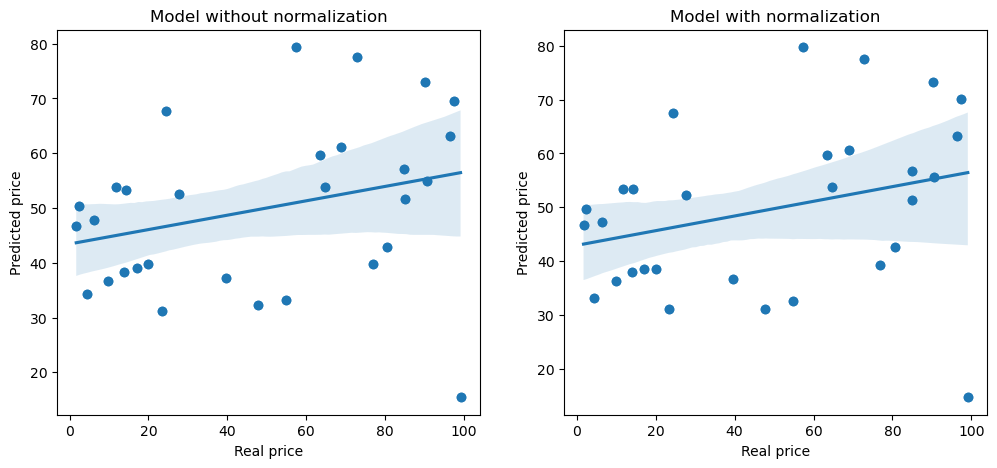

In [98]:
#make scatter plots of the predicted price and the actual price for both models
#make a regplot to see the linear regression model fit (just for visualization)
fig = plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(y_test,y_pred)
plt.title('Model without normalization')
sns.regplot(x=y_test,y=y_pred)
plt.xlabel('Real price')
plt.ylabel('Predicted price')

plt.subplot(1,2,2)
plt.scatter(y_test,y_scaled)
sns.regplot(x=y_test,y=y_scaled)
plt.title('Model with normalization')
plt.xlabel('Real price')
plt.ylabel('Predicted price')

#### Based the R2 score of our model , the R2 score 0.0641 without normalisation and R2 score 0.0662 with normalisation are quite low (equals to 0). 
#### The model's performance is very poor in captuaring the linear relationship between the target and feature variables.
#### It's crucial to consider other evaluation metrics and domain specific requirements to draw meaningful conclusions.